Ref: https://randerson112358.medium.com/stock-price-prediction-using-python-machine-learning-e82a039ac2bb

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071


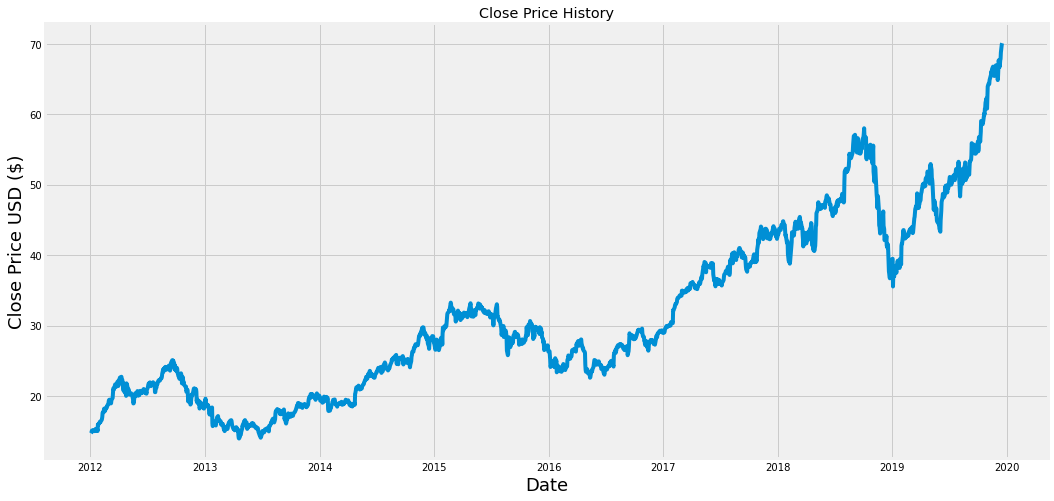

In [3]:
df.shape
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [4]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [5]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

Create a training data set that contains the past 60 day closing price values that we want to use to predict the 61st closing price value.



In [6]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [7]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

Reshape the data to be 3-dimensional in the form [number of samples , number of time steps , and number of features ]. The LSTM model is expecting a 3-dimensional data set.

In [8]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.



In [9]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.add(Dropout(0.2))

In [10]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1543/1543 - 19s - loss: 0.0147
Epoch 2/100
1543/1543 - 18s - loss: 0.0173
Epoch 3/100
1543/1543 - 17s - loss: 0.0167
Epoch 4/100
1543/1543 - 17s - loss: 0.0144
Epoch 5/100
1543/1543 - 16s - loss: 0.0147
Epoch 6/100
1543/1543 - 17s - loss: 0.0161
Epoch 7/100
1543/1543 - 16s - loss: 0.0160
Epoch 8/100
1543/1543 - 16s - loss: 0.0143
Epoch 9/100
1543/1543 - 17s - loss: 0.0167
Epoch 10/100
1543/1543 - 17s - loss: 0.0160
Epoch 11/100
1543/1543 - 16s - loss: 0.0160
Epoch 12/100
1543/1543 - 16s - loss: 0.0145
Epoch 13/100
1543/1543 - 16s - loss: 0.0179
Epoch 14/100
1543/1543 - 16s - loss: 0.0127
Epoch 15/100
1543/1543 - 16s - loss: 0.0134
Epoch 16/100
1543/1543 - 16s - loss: 0.0160
Epoch 17/100
1543/1543 - 17s - loss: 0.0142
Epoch 18/100
1543/1543 - 16s - loss: 0.0137
Epoch 19/100
1543/1543 - 17s - loss: 0.0164
Epoch 20/100
1543/1543 - 18s - loss: 0.0155
Epoch 21/100
1543/1543 - 17s - loss: 0.0150
Epoch 22/100
1543/1543 - 16s - loss: 0.0151
Epoch 23/100
1543/1543 - 16s - loss: 0.01

#### Test Data set

In [11]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
"""
Get all of the rows from index 1603 to the rest and all of the columns 
(in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
"""
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [12]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [13]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [14]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

Get the root mean squared error (RMSE), which is a good measure of how accurate the model is. A value of 0 would indicate that the models predicted values match the actual values from the test data set perfectly.

In [15]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.672558161884858

C:\Users\lucki\WORK\Anaconda3\envs\z-m\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


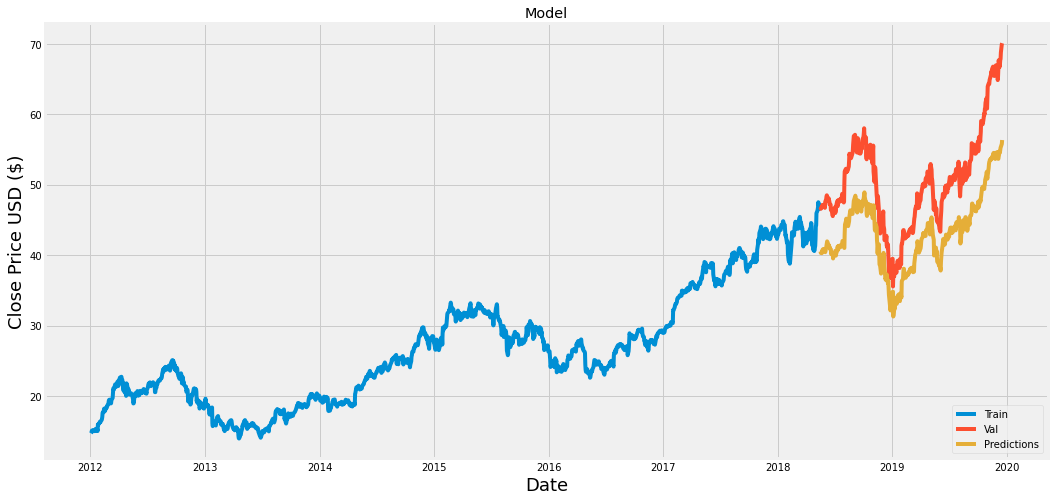

In [16]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show();

In [17]:
#Show the valid and predicted prices
valid.head(3)

,Close,Predictions
Date,,
2018-05-17,46.747501,40.519817
2018-05-18,46.577499,40.302589
2018-05-21,46.907501,40.278210


In [18]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[56.53323]]


In [19]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
